Reference site: http://aishack.in/tutorials/generating-multivariate-gaussian-random/

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def get_gaussian_random():
    m = 0
    while m == 0:
        m = round(np.random.random() * 100)
    numbers = np.random.random(int(m))
    summation = float(np.sum(numbers))
    gaussian = (summation - m/2) / math.sqrt(m/12.0)
    
    return gaussian

In [3]:
def generate_known_gaussian(dimensions):
    count = 10000
    
    ret = []
    for i in range(count):
        current_vector = []
        for j in range(dimensions):
            g = get_gaussian_random()
            current_vector.append(g)
            
        ret.append(tuple(current_vector))
    return ret

In [4]:
def learn_mean_cov_from_sample(pts):
    learned_mean = np.matrix([[0.0], [0.0]])
    learned_cov  = np.zeros( (2, 2) )
    count = len(pts)
    for pt in pts:
        learned_mean += pt
        learned_cov  += pt*pt.transpose()

    learned_mean /= count
    learned_cov /= count
    learned_cov -= learned_mean * learned_mean.transpose()

    print(learned_mean.transpose())
    print(learned_cov)

In [5]:
def main():
    known = generate_known_gaussian(2)
    
    target_mean = np.matrix([[1.0], [3.0]])
    target_cov = np.matrix([[1.0, 0.7],
                            [0.7, 0.6]])
    
    [eigenvalues, eigenvectors] = np.linalg.eig(target_cov)
    
    l = np.matrix(np.diag(np.sqrt(eigenvalues)))
    Q = np.matrix(eigenvectors) * l
    
    x1_tweaked = []
    x2_tweaked = []
    tweaked_all = []
    for i, j in known:
        original = np.matrix([[i], [j]]).copy()
        tweaked = (Q * original) + target_mean
        
        x1_tweaked.append(float(tweaked[0]))
        x2_tweaked.append(float(tweaked[1]))
        tweaked_all.append(tweaked)
    
    learn_mean_cov_from_sample(tweaked_all)
    
    plt.scatter(x1_tweaked, x2_tweaked)
    plt.axis([-6, 10, -6, 10])
    plt.hlines(0, -6, 10)
    plt.vlines(0, -6, 10)
    plt.show()

[[ 0.99372358  3.00298315]]
[[ 0.97632524  0.68424865]
 [ 0.68424865  0.59047596]]


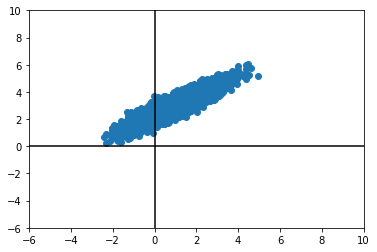

In [6]:
if __name__ == "__main__":
    main()

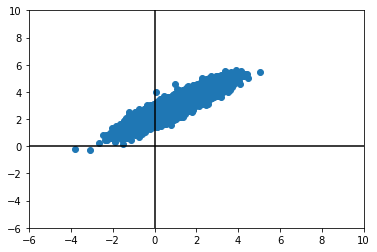

In [7]:
mean = [1.0, 3.0]
cov = [[1.0, 0.7],
       [0.7, 0.6]]

x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.scatter(x, y)
plt.axis([-6, 10, -6, 10])
plt.hlines(0, -6, 10)
plt.vlines(0, -6, 10)
plt.show()